# Статистические инструменты анализа данных

*Python* используют для анализа данных и машинного обучения, подключая к нему различные библиотеки: *Pandas, NumPY, MatPlotLib* и другие. Каждая из них используется для решения конкретных задач.

Сегодня поговорим о Pandas.

In [ ]:
#Импортируем Pandas в наш код:
import pandas as pd

(*pd* - общепринятое сокращение для Pandas в коде).

In [ ]:
#Заодно импортируем библиотеку NumPy (для математических вычислений):
import numpy as np

#Настраиваем Stanza:
!pip install stanza

import stanza

stanza.download("ru")
nlp = stanza.Pipeline(lang="ru", processors="tokenize, pos, lemma, depparse")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 990.1/990.1 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 14.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-man

INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Downloading default packages for language: ru (Russian) ...


INFO:stanza:Downloaded file to /root/stanza_resources/ru/default.zip
INFO:stanza:Finished downloading models and saved to /root/stanza_resources
INFO:stanza:Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


INFO:stanza:Downloaded file to /root/stanza_resources/resources.json
INFO:stanza:Loading these models for language: ru (Russian):
| Processor | Package            |
----------------------------------
| tokenize  | syntagrus          |
| pos       | syntagrus_charlm   |
| lemma     | syntagrus_nocharlm |
| depparse  | syntagrus_charlm   |

INFO:stanza:Using device: cpu
INFO:stanza:Loading: tokenize
INFO:stanza:Loading: pos
INFO:stanza:Loading: lemma
INFO:stanza:Loading: depparse
INFO:stanza:Done loading processors!


# Данные

На прошлом семинаре у нас была таблица. Предлагаю продолжить с ней.

## Формируем таблицу

... а именно корпус новостей.

In [ ]:
corpus_link = 'https://raw.githubusercontent.com/knapweedss/TextMining_HSE/refs/heads/main/2023_spring/sem3/panorama_corpus.tsv'

panorama_corpus = pd.read_csv(corpus_link, sep='\t')

Для скорости возьмем их поменьше, всего 50:

In [ ]:
panorama_corpus = panorama_corpus.iloc[:50]

Разметим:

In [ ]:
cols = ['index', 'text_index', 'word', 'lemma', 'pos', 'feats',
        'synt',  'head']

words = []

for text_index, row in enumerate(panorama_corpus['text']):
  news_nlp = nlp(row)
  for word_index, word in enumerate(news_nlp.iter_words()):
    words.append([word_index, text_index, word.text, word.lemma, word.upos,
                  word.feats, word.deprel, word.head])

panorama_by_word = pd.DataFrame(words, columns = cols)

Посмотрим, что у нас получилось:

In [ ]:
#Смотрим, что у нас получилось (первые 15 слов):
panorama_by_word.head(15)

,index,text_index,word,lemma,pos,feats,synt,head
0,0,0,Государственная,государственный,ADJ,Case=Nom|Degree=Pos|Gender=Fem|Number=Sing,amod,2
1,1,0,дума,дума,NOUN,Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing,nsubj,3
2,2,0,приняла,принять,VERB,Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Te...,root,0
3,3,0,в,в,ADP,None,case,6
4,4,0,третьем,третий,ADJ,Case=Loc|Degree=Pos|Gender=Neut|Number=Sing,amod,6
5,5,0,чтении,чтение,NOUN,Animacy=Inan|Case=Loc|Gender=Neut|Number=Sing,obl,3
6,6,0,законопроект«,законопроекте,NOUN,Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing,obj,3
7,7,0,О,о,ADP,None,case,9
8,8,0,внесении,внесение,NOUN,Animacy=Inan|Case=Loc|Gender=Neut|Number=Sing,nmod,7
9,9,0,изменении,изменение,NOUN,Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing,nmod,9


In [ ]:
panorama_by_word.tail(5) # или так - выводит последние 5

,index,text_index,word,lemma,pos,feats,synt,head
9447,145,49,организацией,организация,NOUN,Animacy=Inan|Case=Ins|Gender=Fem|Number=Sing,obl,4
9448,146,49,",",",",PUNCT,None,punct,4
9449,147,49,ещё,еще,ADV,Degree=Pos,advmod,8
9450,148,49,оценивается,оценивать,VERB,Aspect=Imp|Mood=Ind|Number=Sing|Person=3|Tense...,root,0
9451,149,49,.,.,PUNCT,None,punct,8


## Посмотрим, что за данные

In [ ]:
# Вывод информации о датафрейме (количество строк, столбцов и типы данных в каждом столбце)
panorama_by_word.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9452 entries, 0 to 9451
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       9452 non-null   int64 
 1   text_index  9452 non-null   int64 
 2   word        9452 non-null   object
 3   lemma       9452 non-null   object
 4   pos         9452 non-null   object
 5   feats       6245 non-null   object
 6   synt        9452 non-null   object
 7   head        9452 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 590.9+ KB


In [ ]:
panorama_by_word.describe() # статистика для столбцов с числовыми значениями

,index,text_index,head
count,9452.000000,9452.000000,9452.000000
mean,98.964981,24.182818,11.689061
std,63.394985,14.366833,8.755240
min,0.000000,0.000000,0.000000
25%,47.000000,12.000000,5.000000
50%,94.000000,25.000000,10.000000
75%,142.000000,37.000000,17.000000
max,334.000000,49.000000,56.000000


## Обращение к данным

В DataFrame есть несколько способов для обращения к строкам, столбцам и отдельным элементам таблицы: квадратные скобки и методы loc, iloc.

In [ ]:
set(panorama_by_word['pos']) # уникальные значения столбца pos

{'ADJ',
 'ADP',
 'ADV',
 'AUX',
 'CCONJ',
 'DET',
 'NOUN',
 'NUM',
 'PART',
 'PRON',
 'PROPN',
 'PUNCT',
 'SCONJ',
 'SYM',
 'VERB'}

In [ ]:
panorama_by_word['pos'].unique() # или так

array(['ADJ', 'NOUN', 'VERB', 'ADP', 'PUNCT', 'NUM', 'DET', 'CCONJ',
       'PART', 'PROPN', 'ADV', 'SCONJ', 'AUX', 'PRON', 'SYM'],
      dtype=object)

В метод loc можно передать значение индекса (число, которое стоит в колонке index) строки, чтобы получить эту строку:

In [ ]:
panorama_by_word.loc[2]

index                                                         2
text_index                                                    0
word                                                    приняла
lemma                                                   принять
pos                                                        VERB
feats         Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Te...
synt                                                       root
head                                                          0
Name: 2, dtype: object

In [ ]:
# А с помощью срезов можно выбрать часть таблицы:
panorama_by_word.loc[2:4]

,index,text_index,word,lemma,pos,feats,synt,head
2,2,0,приняла,принять,VERB,Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Te...,root,0
3,3,0,в,в,ADP,None,case,6
4,4,0,третьем,третий,ADJ,Case=Loc|Degree=Pos|Gender=Neut|Number=Sing,amod,6


Срез в loc производится по index и включает в себя последний элемент.

Метод iloc действует похожим образом, но он индексирует элементы не по index, а по порядку в таблице (который может отличаться от index). Например:

In [ ]:
subset = panorama_by_word.sample(5)
subset

,index,text_index,word,lemma,pos,feats,synt,head
3468,127,17,операторы,оператор,NOUN,Animacy=Anim|Case=Nom|Gender=Masc|Number=Plur,nsubj,25
255,109,1,журналистам,журналист,NOUN,Animacy=Anim|Case=Dat|Gender=Masc|Number=Plur,iobj,10
1785,17,9,принять,принять,VERB,Aspect=Perf|VerbForm=Inf|Voice=Act,xcomp,7
8904,71,46,в,в,ADP,None,case,8
8797,187,45,как,как,ADV,Degree=Pos,advmod,18


In [ ]:
subset.iloc[2]

index                                         17
text_index                                     9
word                                     принять
lemma                                    принять
pos                                         VERB
feats         Aspect=Perf|VerbForm=Inf|Voice=Act
synt                                       xcomp
head                                           7
Name: 1785, dtype: object

Если же вызвать просто loc[2], то получим ошибку:

In [ ]:
#subset.loc[2]


С помощью iloc тоже можно делать срезы, но в них последний элемент не включается (как и в обычных срезах в Python, в отличие от loc):

In [ ]:
panorama_by_word.iloc[2:4]

,index,text_index,word,lemma,pos,feats,synt,head
2,2,0,приняла,принять,VERB,Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Te...,root,0
3,3,0,в,в,ADP,None,case,6


Срезы можно брать не только по строкам, но и по столбцам. Обратите внимание на различия индексации столбцов в loc и iloc:

In [ ]:
panorama_by_word.iloc[2:4,2:6]

,word,lemma,pos,feats
2,приняла,принять,VERB,Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Te...
3,в,в,ADP,None


In [ ]:
panorama_by_word.loc[2:4, 'lemma':'feats']

,lemma,pos,feats
2,принять,VERB,Aspect=Perf|Gender=Fem|Mood=Ind|Number=Sing|Te...
3,в,ADP,None
4,третий,ADJ,Case=Loc|Degree=Pos|Gender=Neut|Number=Sing


## Работа с таблицами с помощью Pandas

C полученной таблицей можно сделать *много чего*: извлечь любые данные, аггрегировать, представить в виде, удобном для построения графиков или статистического анализа.

Начнем с извлечения данных. В Pandas можно искать по любой колонке -- например, по лемме:

In [ ]:
panorama_by_word[panorama_by_word['lemma'] == 'телеканал']

,index,text_index,word,lemma,pos,feats,synt,head
1239,0,6,Телеканал,телеканал,NOUN,Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing,nsubj,10
1366,127,6,телеканале,телеканал,NOUN,Animacy=Inan|Case=Loc|Gender=Masc|Number=Sing,nmod,18
1976,6,10,телеканала,телеканал,NOUN,Animacy=Inan|Case=Gen|Gender=Masc|Number=Sing,obl,5
3934,110,20,телеканалами,телеканал,NOUN,Animacy=Inan|Case=Ins|Gender=Masc|Number=Plur,conj,15


Или по POS-тегу

In [ ]:
panorama_by_word[panorama_by_word['pos'] == 'NOUN']

,index,text_index,word,lemma,pos,feats,synt,head
1,1,0,дума,дума,NOUN,Animacy=Inan|Case=Nom|Gender=Fem|Number=Sing,nsubj,3
5,5,0,чтении,чтение,NOUN,Animacy=Inan|Case=Loc|Gender=Neut|Number=Sing,obl,3
6,6,0,законопроект«,законопроекте,NOUN,Animacy=Inan|Case=Acc|Gender=Masc|Number=Sing,obj,3
8,8,0,внесении,внесение,NOUN,Animacy=Inan|Case=Loc|Gender=Neut|Number=Sing,nmod,7
9,9,0,изменении,изменение,NOUN,Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing,nmod,9
...,...,...,...,...,...,...,...,...
9438,136,49,попрания,попрание,NOUN,Animacy=Inan|Case=Gen|Gender=Neut|Number=Sing,conj,22
9439,137,49,законности,законность,NOUN,Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing,nmod,41
9441,139,49,морали,мораль,NOUN,Animacy=Inan|Case=Gen|Gender=Fem|Number=Sing,conj,42
9444,142,49,ущерб,ущерб,NOUN,Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing,nsubj:pass,8


Можно указать несколько параметров поиска. Например, я хочу найти *телеканал*, который является подлежащим.

In [ ]:
panorama_by_word[(panorama_by_word['lemma'] == 'телеканал') &
                 (panorama_by_word['synt'] == 'nsubj')]

,index,text_index,word,lemma,pos,feats,synt,head
1239,0,6,Телеканал,телеканал,NOUN,Animacy=Inan|Case=Nom|Gender=Masc|Number=Sing,nsubj,10


Можно искать и по подстроке, а не по полному совпадению. Например, я хочу найти *телеканал*, среди морфологических признаков которого есть параметр *множественное число*.

In [ ]:
panorama_by_word[(panorama_by_word['lemma'] == 'телеканал') &
                 (panorama_by_word['feats'].str.contains('Number=Plur'))]

,index,text_index,word,lemma,pos,feats,synt,head
3934,110,20,телеканалами,телеканал,NOUN,Animacy=Inan|Case=Ins|Gender=Masc|Number=Plur,conj,15


## Частотные списки
Можно создавать частотные списки.

Функция .groupby группирует таблицу по значениям столбца (). С этими данными можно проводить манипуляции, например, посчитать (для этого используем фукнции *size()* и *count()*)


Посчитаем, слов какой части речи в нашем корпусе больше всего:

In [ ]:
panorama_by_word.groupby('pos').size().nlargest(10)

pos
NOUN     2644
PUNCT    1559
VERB     1108
ADP       998
ADJ       930
PROPN     456
ADV       337
CCONJ     322
PRON      308
DET       226
dtype: int64

In [ ]:
panorama_by_word.groupby('pos').count()


,index,text_index,word,lemma,feats,synt,head
pos,,,,,,,
ADJ,930,930,930,930,928,930,930
ADP,998,998,998,998,0,998,998
ADV,337,337,337,337,337,337,337
AUX,94,94,94,94,89,94,94
CCONJ,322,322,322,322,0,322,322
DET,226,226,226,226,226,226,226
NOUN,2644,2644,2644,2644,2644,2644,2644
NUM,149,149,149,149,147,149,149
PART,166,166,166,166,0,166,166


Проделаем то же самое, но со словами:

In [ ]:
panorama_by_word.groupby('lemma').size().nlargest(25)

lemma
,          629
.          445
в          362
"          291
и          245
на         125
–          122
быть        95
с           95
не          74
что         71
по          62
они         58
год         57
из          49
мочь        47
как         46
а           44
для         42
который     42
весь        41
к           40
мы          37
он          37
о           35
dtype: int64

Что с этими списками не так?

In [ ]:
#Убираем знаки пунктуации

panorama_no_punct = panorama_by_word[panorama_by_word['pos'] != 'PUNCT']
panorama_no_punct.groupby('lemma').size().nlargest(25)

lemma
в          362
и          245
на         125
быть        95
с           95
не          74
что         71
по          62
они         58
год         57
из          49
мочь        47
как         46
а           44
для         42
который     42
весь        41
к           40
мы          37
он          37
о           35
этот        35
свой        31
то          31
Россия      30
dtype: int64

Список нерепрезентативный. На этапе предобработки (помните?) нужно убрать стоп-слова.

К какому-нибудь из столбцов можно применить функцию. Например, посчитать количество символов для каждого из текстов, который у нас есть.

In [ ]:
panorama_corpus['len_text'] = panorama_corpus['text'].map(len)

Посмотрим, что получилось:

In [ ]:
panorama_corpus['len_text'].head(15)

0      991
1     1392
2     1673
3      776
4     1497
5     1505
6      986
7     1306
8      899
9     1190
10     887
11    1107
12    1676
13    1445
14     964
Name: len_text, dtype: int64

Численный параметр можно аггрегировать и посчитать для него неоьходимую метрику. Например, среднее арифметическое:

In [ ]:
panorama_corpus.aggregate('len_text').mean()

1177.2

Или медиану:

In [ ]:
panorama_corpus.aggregate('len_text').median()

1100.0

Или дисперсию, то есть разброс между результатами:

In [ ]:
panorama_corpus.aggregate('len_text').var()

72311.26530612246

## Визуализация данных  

Данные таблицы легко визуализировать. Например, я хочу посмотреть на частотность конкретных слов и сравнить их между собой.

In [ ]:
panorama_by_word[panorama_by_word['lemma'].isin(['новый', 'старый'])]

,index,text_index,word,lemma,pos,feats,synt,head
1336,97,6,старый,старый,ADJ,Case=Nom|Degree=Pos|Gender=Masc|Number=Sing,amod,16
1637,22,8,старой,старый,ADJ,Case=Gen|Degree=Pos|Gender=Fem|Number=Sing,amod,4
1983,13,10,новую,новый,ADJ,Case=Acc|Degree=Pos|Gender=Fem|Number=Sing,amod,15
2956,153,14,старую,старый,ADJ,Case=Acc|Degree=Pos|Gender=Fem|Number=Sing,amod,20
2970,6,15,нового,новый,ADJ,Case=Gen|Degree=Pos|Gender=Masc|Number=Sing,amod,9
3063,99,15,новой,новый,ADJ,Case=Gen|Degree=Pos|Gender=Fem|Number=Sing,amod,34
3097,133,15,новый,новый,ADJ,Case=Nom|Degree=Pos|Gender=Masc|Number=Sing,amod,9
3188,50,16,новому,новый,ADJ,Case=Dat|Degree=Pos|Gender=Masc|Number=Sing,amod,6
3350,9,17,новой,новый,ADJ,Case=Gen|Degree=Pos|Gender=Fem|Number=Sing,amod,11
3506,13,18,новом,новый,ADJ,Case=Loc|Degree=Pos|Gender=Masc|Number=Sing,amod,16


Получилась некрасивая таблица. Давайте построим диаграмму, для этого импортируем необходимые библиотеки.

In [ ]:
#Импортируем модуль для работы с графиками
import matplotlib.pyplot as plt

#Импортируем модуль для построения графиков
import seaborn as sns
sns.set()


Строим диаграмму. (Она называется столбчатой).

<Axes: xlabel='lemma', ylabel='count'>

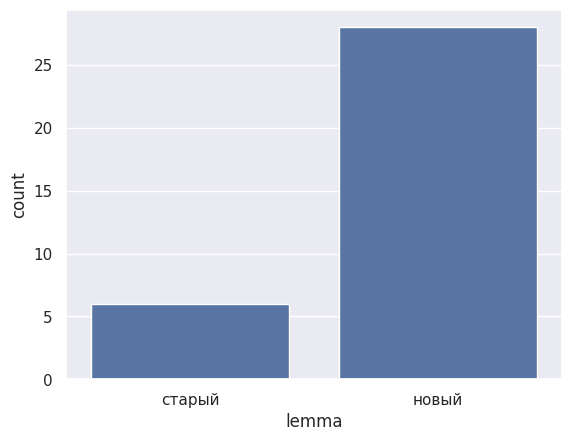

In [ ]:
new_old = panorama_by_word[panorama_by_word['lemma'].isin(['новый', 'старый'])]

#Строим столбчатую диаграмму
sns.countplot(x=new_old['lemma'])

Данные можно снова оформить в виде таблицы.

In [ ]:
for_barplot = new_old[['lemma']].groupby('lemma', as_index=False).size()
for_barplot

,lemma,size
0,новый,28
1,старый,6
